In [8]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
import collections
import seaborn as sns


In [9]:
df = pd.read_csv('data.csv')
df

,protein,tm,sequence
0,1ALC,298,KQFTKCELSQNLYDIDGYGRIALPELICTMFHTSGYDTQAIVENNE...
1,2LZM,324,MNIFEMLRIDERLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAKSEL...
2,1ACP,326,MSTIEERVKKIIGEQLGVKQEEVTNNASFVEDLGADSLDTVELVMA...
3,6I1B,326,MAEVPELASEMMAYYSGNEDDLFFEADGPKQMKCSFQDLDLCPLDG...
4,1BNJ,327,MMKMEGIALKKRLSWISVCLLVLVSAAGMLFSTAAKTETSSHKAHT...
5,1ARR,327,MKGMSKMPQFNLRWPREVLDLVRKVAEENGRSVNSEIYQRVMESFK...
6,1STN,327,MLVMTEYLLSAGICMAIVSILLIGMAISNVSKGQYAKRFFFFATSC...
7,1BN1,328,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...
8,3RN3,332,MALKSLVLLSLLVLVLLLVRVQPSLGKETAAAKFERQHMDSSTSAA...
9,1ABE,332,MHKFTKALAAIGLAAVMSQSAMAENLKLGFLVKQPEEPWFQTEWKF...


In [10]:
# In addition to structural and sequence features, combination of features may also act as a key to 
# thermostability (Farias et al., 2004). Research (Farias et al., 2004) has shown that the ratio 
# between glutamic acid plus lysine and glutamine plus histidine gives a higher thermostability. 
# This means that combination of amino acid (E + K)/(Q + H) may be important to protein thermostability.

proteins = df['protein']

X = df.drop(['tm'], axis=1)
y = df['tm']


# add features
for index, row in X.iterrows():
    sequence = row[1]
    counts = collections.Counter(sequence)
    
    # add (E + K)/(Q + H) ratio feature
    if (counts['Q'] + counts['H']) != 0:
        X.at[index, '(E + K)/(Q + H)'] = (counts['E'] + counts['K']) /(counts['Q'] + counts['H'])
    else:
        X.at[index, '(E + K)/(Q + H)'] = 0   
        
    X.at[index, 'E'] = 1 if counts['E'] > 0 else 0   

        
    


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)


In [16]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 2))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [17]:
model.fit(X_train.drop(['protein', 'sequence'], axis=1), y_train, batch_size = 10, epochs = 100)


Epoch 1/100
27/27 [==============================] - 1s 19ms/step - loss: 117819.8359
Epoch 2/100
27/27 [==============================] - 0s 210us/step - loss: 117706.7873
Epoch 3/100
27/27 [==============================] - 0s 209us/step - loss: 117578.5307
Epoch 4/100
27/27 [==============================] - 0s 209us/step - loss: 117459.5049
Epoch 5/100
27/27 [==============================] - 0s 217us/step - loss: 117319.2208
Epoch 6/100
27/27 [==============================] - 0s 227us/step - loss: 117176.3915
Epoch 7/100
27/27 [==============================] - 0s 235us/step - loss: 117008.9511
Epoch 8/100
27/27 [==============================] - 0s 365us/step - loss: 116835.0463
Epoch 9/100
27/27 [==============================] - 0s 235us/step - loss: 116641.2598
Epoch 10/100
27/27 [==============================] - 0s 236us/step - loss: 116423.3168
Epoch 11/100
27/27 [==============================] - 0s 223us/step - loss: 116183.1534
Epoch 12/100
27/27 [======================

27/27 [==============================] - 0s 203us/step - loss: 7279.7458
Epoch 96/100
27/27 [==============================] - 0s 188us/step - loss: 7064.3749
Epoch 97/100
27/27 [==============================] - 0s 205us/step - loss: 6846.0174
Epoch 98/100
27/27 [==============================] - 0s 166us/step - loss: 6603.1994
Epoch 99/100
27/27 [==============================] - 0s 189us/step - loss: 6407.8772
Epoch 100/100
27/27 [==============================] - 0s 190us/step - loss: 6206.5391


In [ ]:
# width = 0.4

# y_pred = model.predict(X_test.drop(['protein', 'sequence'], axis=1))

# pred = [float(y_pred[i]) for i in range(len(y_pred))]

# ind = [i for i in range(len(pred))]

# fig = plt.figure()
# ax = fig.add_subplot(111)

# real_values = ax.bar(X_test['protein'], y_test, color = 'red', label = 'Real', width=0.4)
# pred_values = ax.bar(X_test['protein'], pred, color = 'blue', label = 'Predicted', width=0.4)
# plt.title('Prediction')
# plt.ylabel('Tm') 
# plt.xlabel('Protein') 
# ind = np.arange(len(y_test))
# ax.set_xticks(ind + width)
# ax.legend((y_test, pred), ('true', 'predicted'))
# sns.set()
# plt.show()


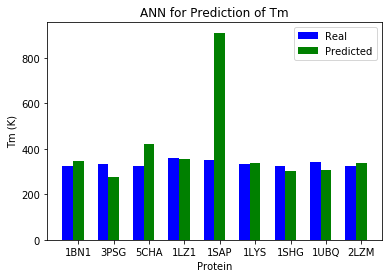

In [19]:
pred = model.predict(X_test.drop(['protein', 'sequence'], axis=1))


ind = np.arange(len(pred))  # the x locations for the groups
width = 0.30 #  the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)


y_pred = model.predict(X_test.drop(['protein', 'sequence'], axis=1))

y_pred = [float(y_pred[i]) for i in range(len(y_pred))]


real_bar = ax.bar(ind, y_test.values, width, color='b')
# zvals = [1,2,3]
predicted_bar = ax.bar(ind+ width, y_pred, width, color='g')
# kvals = [11,12,13]

ax.set_ylabel('Tm')
ax.set_xticks(ind+width)
ax.set_xticklabels( X_train['protein'] )
ax.legend( (real_bar[0], predicted_bar[0]), ('Real', 'Predicted') )

plt.title('ANN for Prediction of Tm')
plt.ylabel('Tm (K)') 
plt.xlabel('Protein') 


# adds the y-value to each bar 
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)
